In [1]:
import numpy as np
import torch
from __future__ import print_function


import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
torch

<module 'torch' from '/Users/yennanliu/anaconda3/envs/pytorch_/lib/python3.5/site-packages/torch/__init__.py'>

## 0) Get data 

In [3]:
#from sklearn.datasets import load_boston
from sklearn.datasets import make_regression

def get_1D_data():
    data = make_regression(n_samples=300, n_features=1)
    #print (data.shape)
    x= data[0]
    y= data[1]
    # add some noise 
    # reshape noise to form : (300,1)
    x = x+np.random.normal(0,0.5,300).reshape((300, 1))
    return x, y
    

In [4]:
x,y = get_1D_data()

Text(0,0.5,'y')

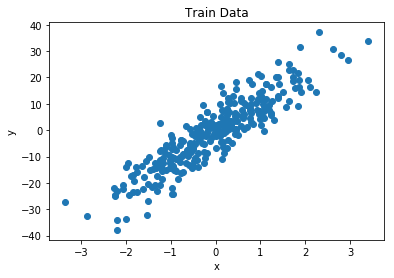

In [5]:
plt.scatter(x,y)
plt.title('Train Data')
plt.xlabel('x')
plt.ylabel('y')

## 1) 1-D Linear Regression 

In [6]:
# make data to variable -> for forward and back propagation

# the pytorch expect the data with form : float tensor 
# so have to transform numpy dtype=float64 ->  torch.FloatTensor 
# https://discuss.pytorch.org/t/input-preparation/98/2
x_train = torch.from_numpy(x).float()
y_train = torch.from_numpy(y).float()


In [7]:
print (type(x))
print (type(x_train))

<class 'numpy.ndarray'>
<class 'torch.FloatTensor'>


In [9]:
from torch import nn
from torch import optim
from torch.autograd import Variable


# help function that run 1D linear regression via pytorch 

class linear_regression(nn.Module):
    def __init__(self):
        ### todo : add super comment 
        super(linear_regression,self).__init__()
        # set input and and outout as 1 dimension 
        self.linear = nn.Linear(1,1)
    def forward(self,x):
        out = self.linear(x)
        return out 
    #model = linear_regression()

In [10]:
model = linear_regression()

In [11]:
# define cost function and optimization function 
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [12]:
# train the model 

epochs = 1000
for epoch in range(epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)

    # forward 
    out = model(inputs)
    loss = criterion(out,target)

    # backward 
    ### HAVE TO ZERO gradient EVERY TIME before doing back propagation
    #    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1)%20 ==0:
        print ('epoch : {}/{}, loss : {:.6f}'
               .format(epoch+1,epochs, loss.data[0] ))


epoch : 20/1000, loss : 183.077377
epoch : 40/1000, loss : 169.198608
epoch : 60/1000, loss : 156.595749
epoch : 80/1000, loss : 145.151093
epoch : 100/1000, loss : 134.757980
epoch : 120/1000, loss : 125.319611
epoch : 140/1000, loss : 116.747932
epoch : 160/1000, loss : 108.963181
epoch : 180/1000, loss : 101.892914
epoch : 200/1000, loss : 95.471436
epoch : 220/1000, loss : 89.638908
epoch : 240/1000, loss : 84.341309
epoch : 260/1000, loss : 79.529320
epoch : 280/1000, loss : 75.158287
epoch : 300/1000, loss : 71.187813
epoch : 320/1000, loss : 67.580925
epoch : 340/1000, loss : 64.304337
epoch : 360/1000, loss : 61.327629
epoch : 380/1000, loss : 58.623280
epoch : 400/1000, loss : 56.166302
epoch : 420/1000, loss : 53.934021
epoch : 440/1000, loss : 51.905762
epoch : 460/1000, loss : 50.062881
epoch : 480/1000, loss : 48.388260
epoch : 500/1000, loss : 46.866577
epoch : 520/1000, loss : 45.483780
epoch : 540/1000, loss : 44.227139
epoch : 560/1000, loss : 43.085159
epoch : 580/100

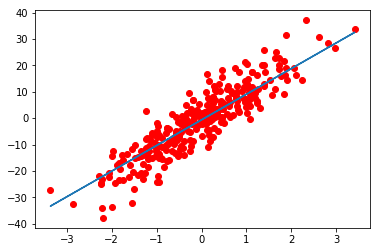

In [13]:
model.eval()
predict = model(Variable(x_train))
predict =predict.data.numpy()
plt.plot(x_train.numpy(),y_train.numpy(),'ro', label='original data')
plt.plot(x_train.numpy(),predict, label='fitting line')
plt.show()

In [14]:
#target

## 2) N-D Linear Regression 